<a href="https://colab.research.google.com/github/RogerHeederer/NLP_entry/blob/master/LinearVsLogistic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Reference Source : wikidocs.net 유영준님 자료

스스로 학습하면서 필요한 부분에는 추가적 설명, 소스 코드 삽입 및 수정 등이 있습니다. 영리적 목적이 아닌, 자기 계발 목적으로 정리한 자료입니다.


##선형 회귀##
- 연속된 수치값을 예측할 때 사용
1. H(x): Wx+b 가설 , Linear Function
2. Cost,Loss,Objective Function : 가설과 실제값의 차이를 계산. MSE 함수 사용
3. Optimizer : Cost Function 결과값을 최소화하는 알고리즘. 경사하강법 사용

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import optimizers
import numpy as np

X = np.array([1,2,3,4,5,6,7,8,9])
y = np.array([11,22,33,44,55,66,77,87,95])

model=Sequential()
model.add(Dense(1, input_dim=1, activation='linear'))
sgd=optimizers.SGD(lr=0.01)
model.compile(optimizer=sgd, loss='mse', metrics=['mse'])
model.fit(X,y, batch_size=1, epochs=300, shuffle=False)

Epoch 1/300
9/9 [==============================] - 0s 1ms/step - loss: 321.6657 - mse: 321.6657
Epoch 2/300
9/9 [==============================] - 0s 1ms/step - loss: 1.7956 - mse: 1.7956
Epoch 3/300
9/9 [==============================] - 0s 1ms/step - loss: 1.7980 - mse: 1.7980
Epoch 4/300
9/9 [==============================] - 0s 1ms/step - loss: 1.8004 - mse: 1.8004
Epoch 5/300
9/9 [==============================] - 0s 1ms/step - loss: 1.8027 - mse: 1.8027
Epoch 6/300
9/9 [==============================] - 0s 1ms/step - loss: 1.8049 - mse: 1.8049
Epoch 7/300
9/9 [==============================] - 0s 1ms/step - loss: 1.8070 - mse: 1.8070
Epoch 8/300
9/9 [==============================] - 0s 1ms/step - loss: 1.8091 - mse: 1.8091
Epoch 9/300
9/9 [==============================] - 0s 1ms/step - loss: 1.8111 - mse: 1.8111
Epoch 10/300
9/9 [==============================] - 0s 1ms/step - loss: 1.8131 - mse: 1.8131
Epoch 11/300
9/9 [==============================] - 0s 1ms/step - loss: 1.8

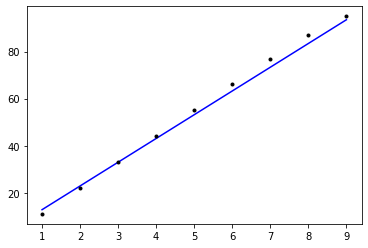

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(X, model.predict(X), 'b', X,y, 'k.')

In [ ]:
print(model.predict([9.5]))

[[98.55561]]


## 로지스틱 회귀 ##

이름만 회귀이며, 분류 문제에 사용하는 알고리즘

1. H(x): sigmoid(Wx+b)
2. Cost,Loss,Objective Function : 크로스 엔트로피 함수 사용. 가설과 실제값의 차이를 계산
3. Optimizer : Cost Function 결과값을 최소화하는 알고리즘. 경사하강법 사용

In [4]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

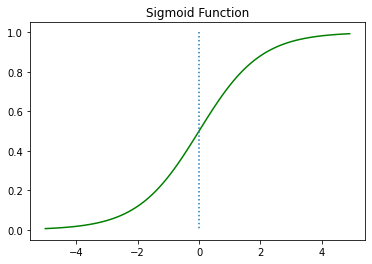

In [6]:
def sigmoid(x): # 출력값은 0과 1사이의 값
  return 1/(1+np.exp(-x))

x = np.arange(-5.0, 5.0, 0.1)
y = sigmoid(x)

plt.plot(x, y, 'g')
plt.plot([0,0], [1.0, 0.0], ':') #가운데 점선 추가
plt.title('Sigmoid Function')
plt.show()

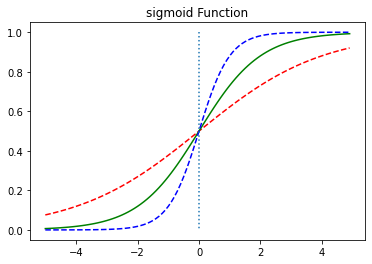

In [7]:
# W값의 변화에 따라 sigmoid 그래프가 어떻게 변하는지 확인
def sigmoid(x):
  return 1/(1+np.exp(-x))
x = np.arange(-5.0, 5.0, 0.1)
y1 = sigmoid(0.5*x)
y2 = sigmoid(x)
y3 = sigmoid(2*x)

plt.plot(x, y1, 'r', linestyle='--') # w 값이 0.5
plt.plot(x, y2, 'g') # w 값이 1
plt.plot(x, y3, 'b', linestyle='--') # w값이 2
plt.plot([0,0],[1.0,0.0], ':') #가운데 점선 추가
plt.title('sigmoid Function')
plt.show()

** W의 값이 커지면 경사도도 커짐**

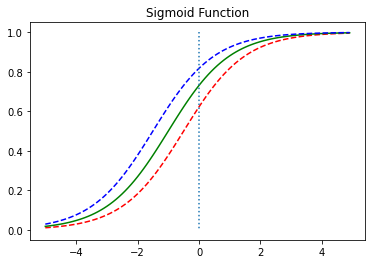

In [8]:
# b값의 변화에 따라 sigmoid 그래프가 어떻게 변하는지 확인

def sigmoid(x):
  return 1/(1+np.exp(-x))

x = np.arange(-5.0, 5.0, 0.1)
y1 = sigmoid(x+0.5)
y2 = sigmoid(x+1)
y3 = sigmoid(x+1.5)

plt.plot(x, y1, 'r', linestyle='--') # x + 0.5
plt.plot(x, y2, 'g') # x + 1
plt.plot(x, y3, 'b', linestyle='--') # x + 1.5
plt.plot([0,0],[1.0,0.0], ':') # 가운데 점선 추가
plt.title('Sigmoid Function')
plt.show()

In [15]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import optimizers

X=np.array([-50, -40, -30, -20, -10, -5, 0, 5, 10, 20, 30, 40, 50])
y=np.array([0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1]) #숫자 10부터 1

model=Sequential()
model.add(Dense(1, input_dim=1, activation='sigmoid'))
sgd=optimizers.SGD(lr=0.01)
model.compile(optimizer=sgd ,loss='binary_crossentropy',metrics=['binary_accuracy'])
model.fit(X,y, batch_size=1, epochs=200, shuffle=False, verbose=0)

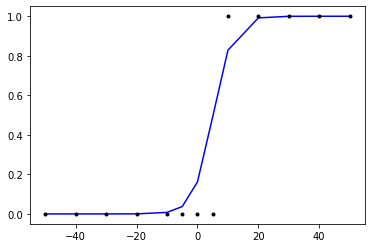

In [16]:
plt.plot(X, model.predict(X), 'b', X,y, 'k.')

In [17]:
print(model.predict([1, 2, 3, 4, 4.5]))
print(model.predict([11, 21, 31, 41, 500]))

[[0.21061486]
 [0.26898393]
 [0.33663082]
 [0.4117088 ]
 [0.45111012]]
[[0.8691163 ]
 [0.9939856 ]
 [0.99975693]
 [0.99999034]
 [1.        ]]
